In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Rakesh\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_excel('Employee_income.xlsx')
df[:3]

,Name,Age,Income
0,Amit,27,70000
1,Akash,29,90000
2,Shriya,29,61000


In [3]:
from sklearn.cluster import KMeans

In [4]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [5]:
df.columns

Index(['Name', 'Age', 'Income'], dtype='object')

In [6]:
X = df[['Age','Income']]
X[:3]

,Age,Income
0,27,70000
1,29,90000
2,29,61000


In [7]:
km.fit(X)

KMeans(n_clusters=3)

In [8]:
km.fit_predict(X)

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0,
       0, 1])

In [21]:
X['Cluster'] = km.fit_predict(X)
X[:3]

,Age,Income,Cluster
0,27,70000,2
1,29,90000,2
2,29,61000,1


In [11]:
df[:3]

,Name,Age,Income
0,Amit,27,70000
1,Akash,29,90000
2,Shriya,29,61000


In [12]:
km.labels_

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0,
       0, 1])

In [22]:
km.predict([[28,59000]])

ValueError: n_samples=1 should be >= n_clusters=3.

In [24]:
km.cluster_centers_

array([[3.8750e+01, 1.5150e+05, 1.0000e+00],
       [3.2500e+01, 5.6375e+04, 2.0000e+00],
       [3.4500e+01, 8.0500e+04, 0.0000e+00]])

In [28]:
a = km.cluster_centers_[:,0] #age data

In [29]:
i = km.cluster_centers_[:,1] #income data

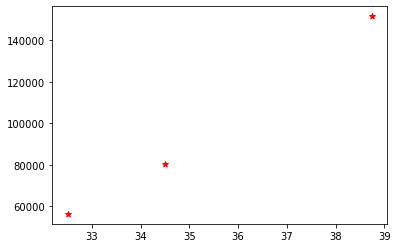

In [31]:
plt.scatter(a,i,color='r',marker='*')

In [39]:
df1 = X[X['Cluster']==0]
df1[:3]

,Age,Income,Cluster
4,42,155000,0
5,39,160000,0
6,41,162000,0


In [40]:
df2 = X[X['Cluster']==1]
df2[:3]

,Age,Income,Cluster
2,29,61000,1
3,28,62000,1
10,37,45000,1


In [42]:
df3 = X[X['Cluster']==2]
df3[:3]

,Age,Income,Cluster
0,27,70000,2
1,29,90000,2
18,43,80000,2


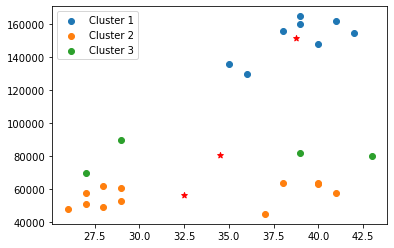

In [52]:
plt.scatter(df1['Age'],df1['Income'],label='Cluster 1')
plt.scatter(df2['Age'],df2['Income'],label='Cluster 2')
plt.scatter(df3['Age'],df3['Income'],label = 'Cluster 3')
plt.legend()
plt.scatter(a,i,color = 'r',marker = '*');

# 1.Using Standardisation

In [54]:
from sklearn.preprocessing import StandardScaler

In [56]:
sc =StandardScaler()
sc

StandardScaler()

In [66]:
x1 = sc.fit_transform(X[['Age','Income']])
x =pd.DataFrame(x1,columns=['Age','Income'])
x['Cluster']=km.fit_predict(x)
x[:2]

,Age,Income,Cluster
0,-1.362857,-0.505439,1
1,-1.018556,-0.048114,1


# plot the scatter plot

In [69]:
A = km.cluster_centers_[:,0] # AGE
A

array([ 0.82591158, -1.2289619 ,  0.6599095 ])

In [71]:
I = km.cluster_centers_[:,1]
I

array([-0.61650355, -0.72774958,  1.35815888])

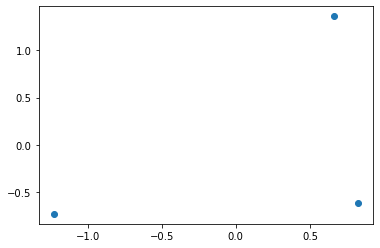

In [72]:
plt.scatter(A,I)

In [75]:
DF0 = x[x['Cluster']==0]
DF0

,Age,Income,Cluster
10,0.358646,-1.077095,0
16,0.875097,-0.665503,0
17,0.875097,-0.642636,0
18,1.391548,-0.276777,0
19,0.702947,-0.231044,0
20,1.047248,-0.779834,0
21,0.530797,-0.642636,0


In [78]:
DF1 =x[x['Cluster']==1]

In [80]:

DF2 = x[x['Cluster']==2]
DF2

,Age,Income,Cluster
4,1.219398,1.438191,2
5,0.702947,1.552522,2
6,1.047248,1.598254,2
7,0.530797,1.461057,2
8,0.186496,0.866535,2
9,0.014346,1.003732,2
15,0.702947,1.666853,2
23,0.875097,1.278127,2


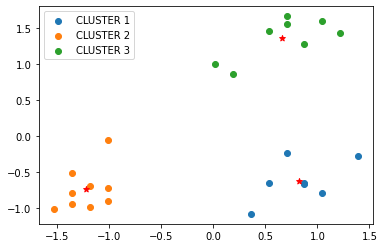

In [82]:
plt.scatter(DF0['Age'],DF0['Income'],label='CLUSTER 1')
plt.scatter(DF1['Age'],DF1['Income'],label='CLUSTER 2')
plt.scatter(DF2['Age'],DF2['Income'],label='CLUSTER 3')
plt.legend()
plt.scatter(A,I,marker='*',color = 'r')

In [83]:
from sklearn.metrics import silhouette_score

In [88]:
km.labels_

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0,
       1, 2])

In [92]:
ss = silhouette_score(x,km.labels_)
ss

0.7789690576493739

# 2. Using Normalisation

In [94]:
from sklearn.preprocessing import Normalizer

In [96]:
n = Normalizer()
n

Normalizer()

In [108]:
x0 = n.fit_transform(X[['Age','Income']])
x1 = pd.DataFrame(x0,columns=['Age','Income'])
x1['Cluster'] = km.fit_predict(x1)
x1[:2]

,Age,Income,Cluster
0,0.000386,1.0,1
1,0.000322,1.0,1


In [113]:
km.labels_

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 1, 2, 2, 0, 0, 2, 0,
       0, 1])

In [112]:
silhouette_score(X,km.labels_)

0.08962904342230604